In [1]:
import gdsfactory as gf

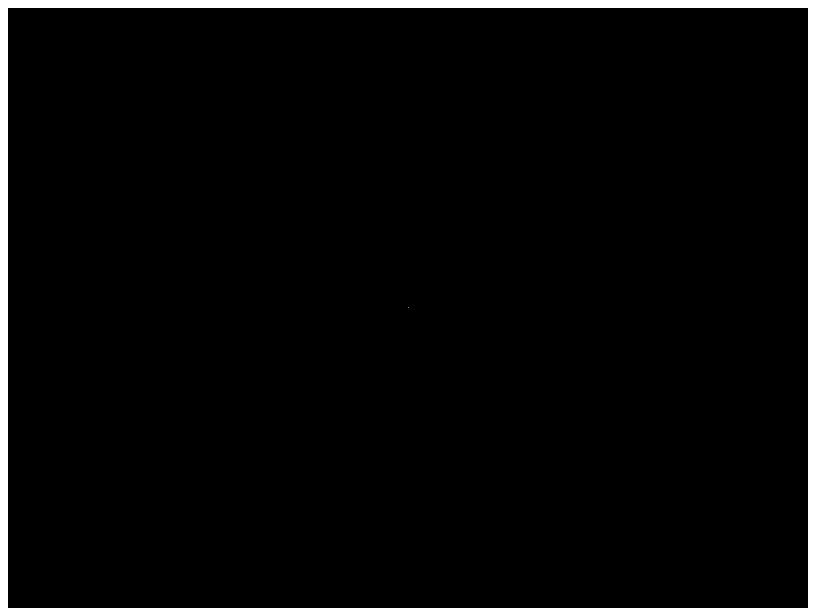

In [2]:
# Create top-level component
c = gf.Component() #mzm_with_rings

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/113190844.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  wg = gf.components.straight(length=30).copy()  # Straight waveguide


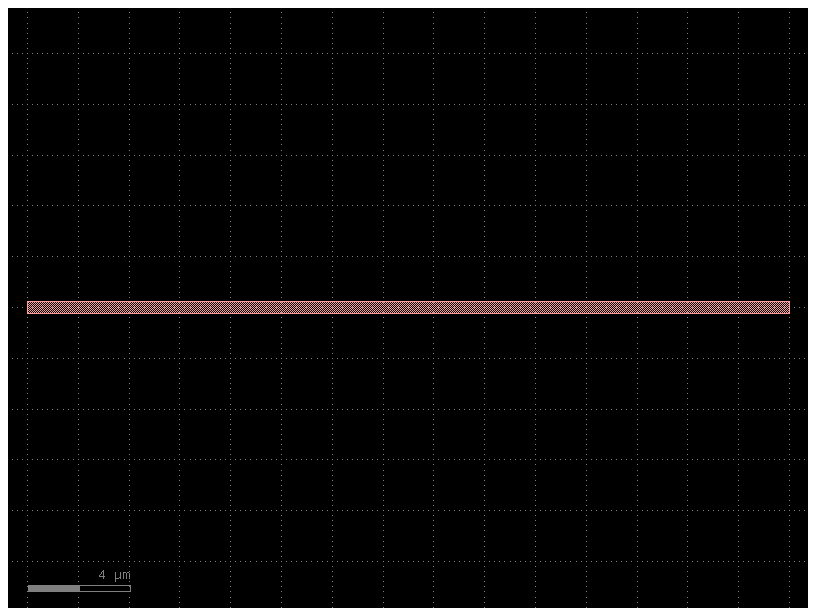

In [3]:
wg = gf.components.straight(length=30).copy()  # Straight waveguide

# wg.draw_ports()

wg1 = c << wg
wg2 = c << wg
wg3 = c << wg
wg4 = c << wg

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/2785073809.py:2: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  input_grating = gf.components.grating_coupler_elliptical(polarization='te').copy()  # Input grating coupler


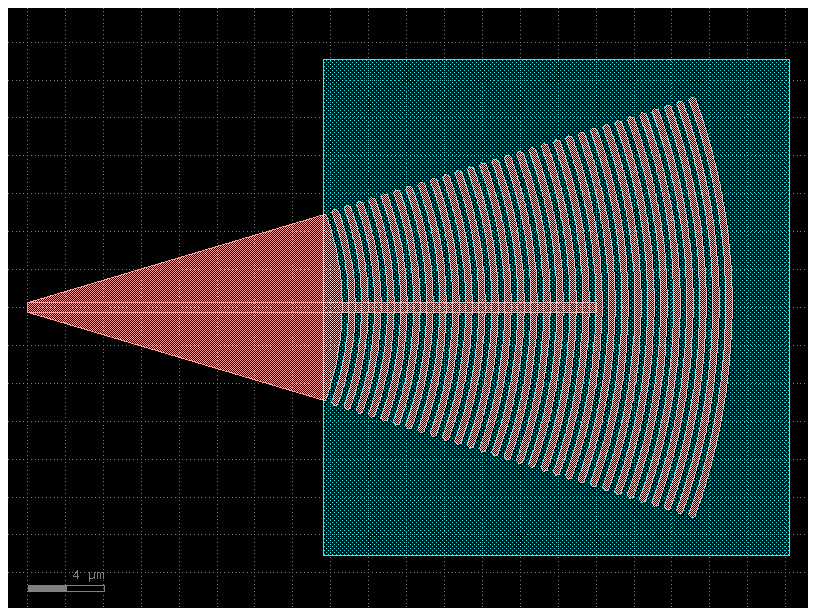

In [4]:
# Define components
input_grating = gf.components.grating_coupler_elliptical(polarization='te').copy()  # Input grating coupler

# input_grating.draw_ports()

# Add components
gc_in = c << input_grating

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/2666004556.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  output_grating = gf.components.grating_coupler_elliptical(polarization='te').copy()  # Output grating coupler


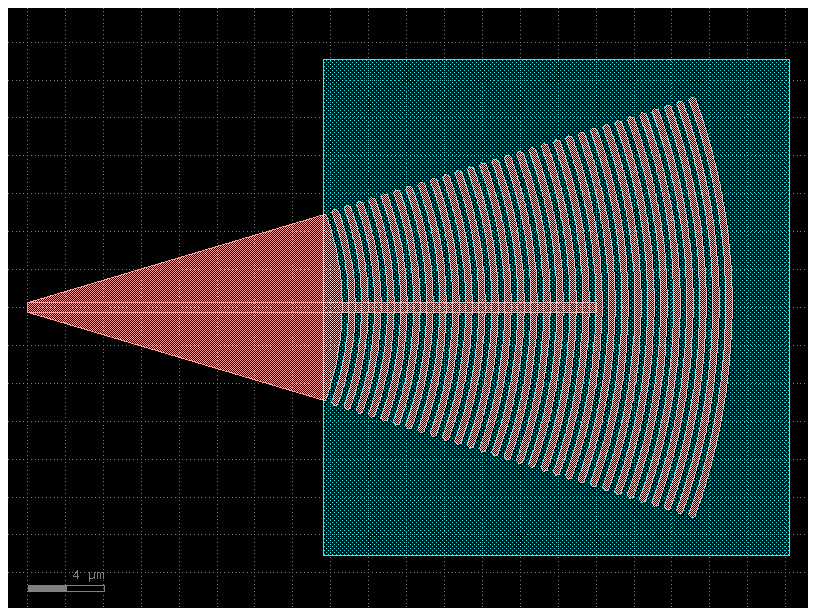

In [5]:
output_grating = gf.components.grating_coupler_elliptical(polarization='te').copy()  # Output grating coupler

# output_grating.draw_ports()

gc_out = c << output_grating

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/2349030841.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  mzi_base = gf.components.mzi(bend='bend_euler', straight='straight', length_y=10, splitter='mmi1x2', with_splitter=True, port_e1_splitter='o2', port_e0_splitter='o3', port_e1_combiner='o2', port_e0_combiner='o3', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()  # MZM


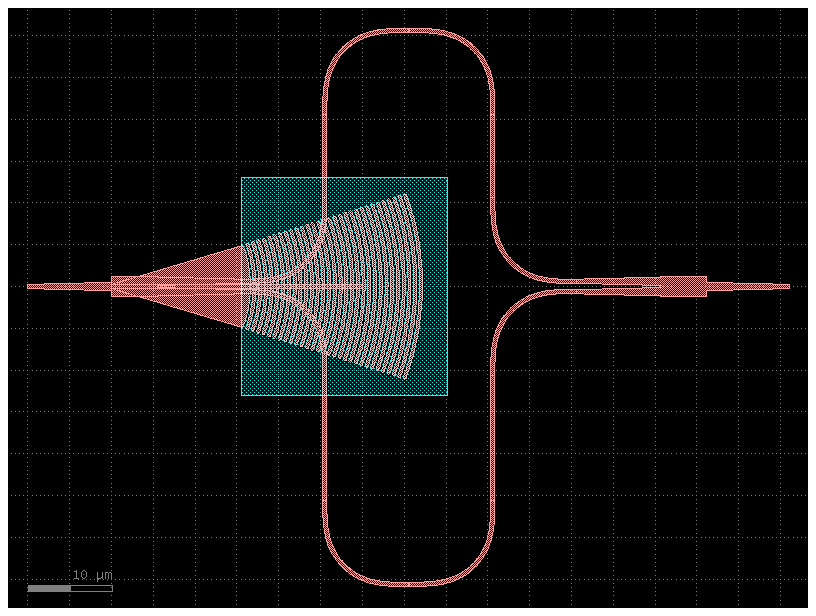

In [6]:
mzi_base = gf.components.mzi(bend='bend_euler', straight='straight', length_y=10, splitter='mmi1x2', with_splitter=True, port_e1_splitter='o2', port_e0_splitter='o3', port_e1_combiner='o2', port_e0_combiner='o3', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()  # MZM

# mzi_base.draw_ports()

mzi_ref = c << mzi_base  # MZM reference

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/3535715825.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  ring_mod1 = gf.components.ring_single_pn(gap=0.4, radius=10, doping_angle=250, doped_heater=True, doped_heater_angle_buffer=10, doped_heater_layer='NPP', doped_heater_width=0.5, doped_heater_waveguide_offset=1.175).copy()    # Ring modulator for arm 1


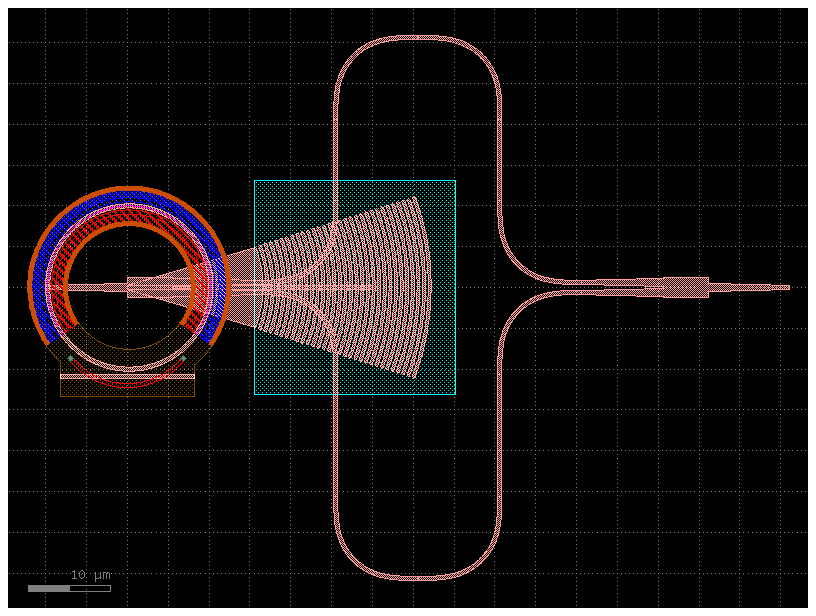

In [7]:
ring_mod1 = gf.components.ring_single_pn(gap=0.4, radius=10, doping_angle=250, doped_heater=True, doped_heater_angle_buffer=10, doped_heater_layer='NPP', doped_heater_width=0.5, doped_heater_waveguide_offset=1.175).copy()    # Ring modulator for arm 1

# ring_mod1.draw_ports()

ring1 = c << ring_mod1

c.plot()

/var/folders/fr/t8w_2pkd0_z3xg500tnxww5c0000gn/T/ipykernel_31436/764780121.py:1: UserWarning: copy() is deprecated and will be removed in gdsfactory9. Please use dup() instead.
  ring_mod2 = gf.components.ring_single_pn(radius=10, gap=0.4).copy()  # Ring modulator for arm 2


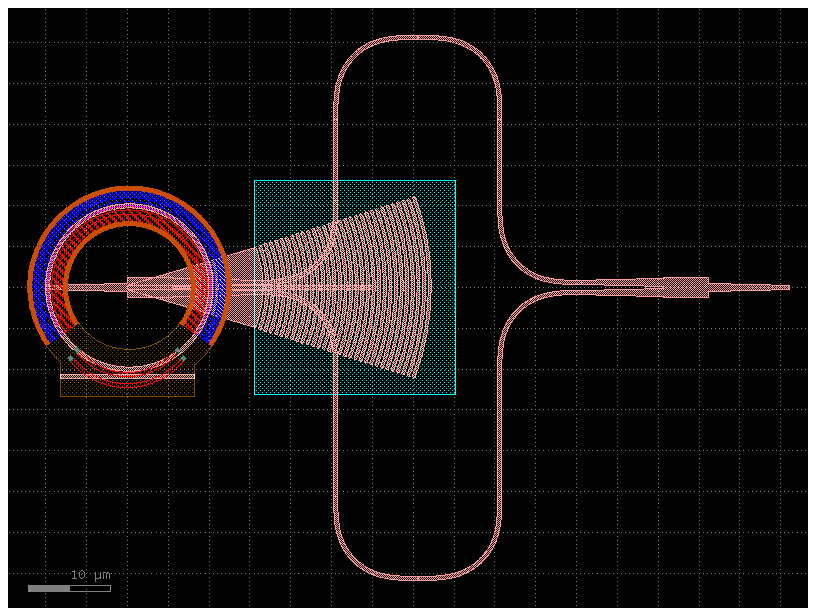

In [8]:
ring_mod2 = gf.components.ring_single_pn(radius=10, gap=0.4).copy()  # Ring modulator for arm 2

# ring_mod2.draw_ports()

ring2 = c << ring_mod2

c.plot()

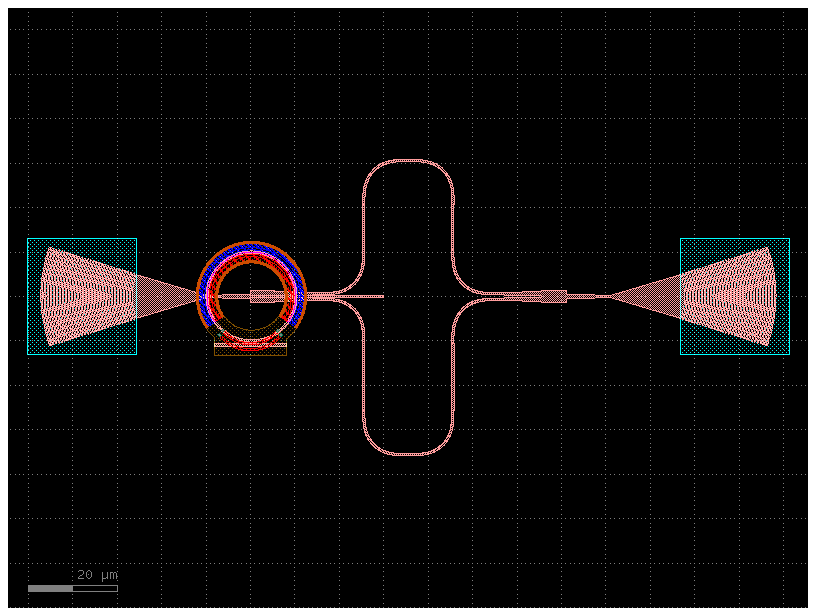

In [9]:
gc_in.connect("o1", mzi_ref.ports["o1"])  # Input grating to MZM
gc_out.connect("o1", mzi_ref.ports["o2"])  # MZM combiner to output grating

c.plot()

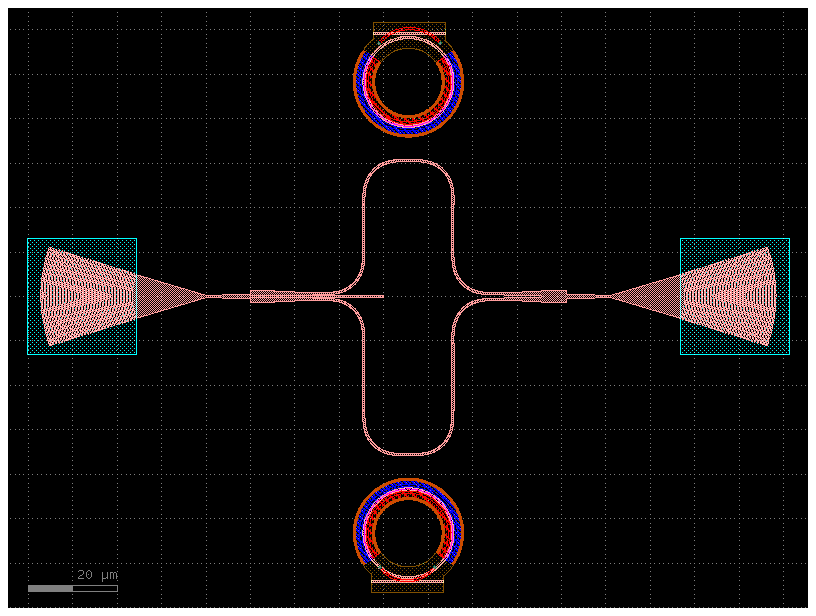

In [10]:
ring1.rotate(180)

ring1.dcenter = mzi_ref.dcenter
ring2.dcenter = mzi_ref.dcenter

ring1.ymin = mzi_ref.ymax + 5
ring2.ymax = mzi_ref.ymin - 5

c.plot()

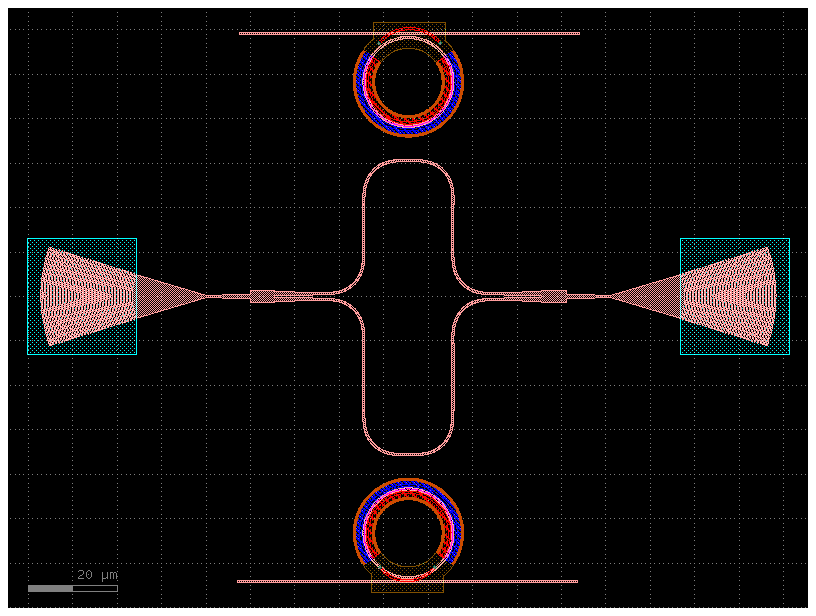

In [11]:
wg1.connect("o2", ring1.ports["o2"])
wg2.connect("o1", ring1.ports["o1"])
wg3.connect("o2", ring2.ports["o1"])
wg4.connect("o1", ring2.ports["o2"])

c.plot()

┏━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ name       ┃ width ┃ orientation ┃ layer    ┃ center                    ┃ port_type   ┃
┡━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ gratingIn  │ 10.0  │ 180.0       │ WG (1/0) │ (-26.6, 0.0)              │ vertical_te │
│ gratingOut │ 10.0  │ 0.0         │ WG (1/0) │ (97.7, 0.0)               │ vertical_te │
│ ring1O1    │ 0.5   │ 180.0       │ WG (1/0) │ (-2.426, 59.2)            │ optical     │
│ ring1O2    │ 0.5   │ 0.0         │ WG (1/0) │ (73.95700000000001, 59.2) │ optical     │
│ ring2O1    │ 0.5   │ 180.0       │ WG (1/0) │ (-2.857, -64.2)           │ optical     │
│ ring2O2    │ 0.5   │ 0.0         │ WG (1/0) │ (73.526, -64.2)           │ optical     │
└────────────┴───────┴─────────────┴──────────┴───────────────────────────┴─────────────┘

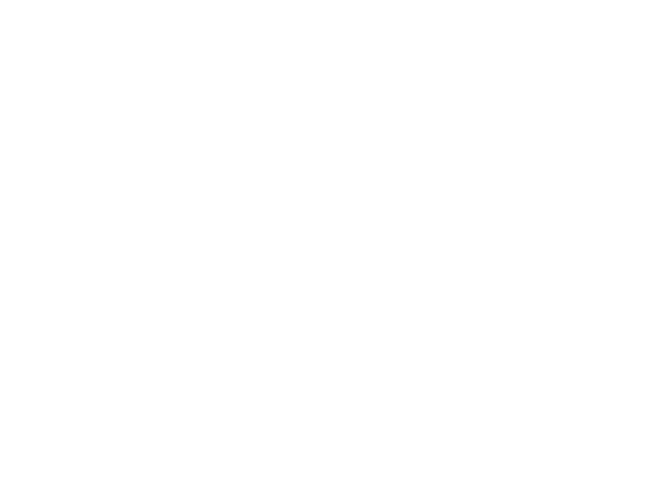

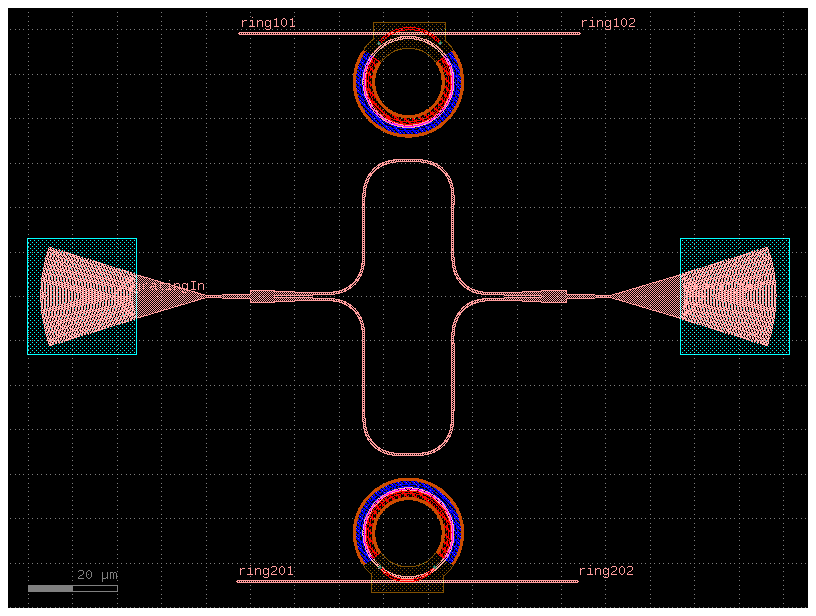

In [12]:
c.add_port(name='gratingIn', port=gc_in.ports['o2'])
c.add_port(name='gratingOut', port=gc_out.ports['o2'])


c.add_port(name='ring1O1', port=wg1.ports['o1'])
c.add_port(name='ring1O2', port=wg2.ports['o2'])

c.add_port(name='ring2O1', port=wg3.ports['o1'])
c.add_port(name='ring2O2', port=wg4.ports['o2'])

c.draw_ports()

c.pprint_ports()

c.plot_netlist()

c.plot()

In [13]:
c.show()

2025-07-08 14:35:14.301 | INFO     | kfactory.kcell:show:8802 - klive v0.3.3: Reloaded file '/Users/taufiqhidayat/Documents/EL4064/build/gds/4020511028.oas'
